## Laboratorio. Árboles y random forest para regresión y clasificación

## Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [32]:
semilla_aleatoria = 1234
#cons_no_asignado="NoAsignado"
#max_mostrar_frecuencias = 0

# 1.- Leer los datos del archivo pima-indians-diabetes.csv

In [2]:
df_base=pd.read_csv("pima-indians-diabetes.csv")

display(df_base.head(5))
#268 diabeticos, etiqueta 1.

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_base.shape

(768, 9)

In [4]:
df_base[(df_base['diabetes']==1)]

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [5]:
df_base.dtypes

nEmbarazos                    int64
concentracionGlucosa          int64
presionArterialSistolica      int64
pliegueCutaneo                int64
insulinaSerica                int64
IMC                         float64
funcionPediDiabe            float64
edad                          int64
diabetes                      int64
dtype: object

# 2.- Análisis exploratorio de los datos

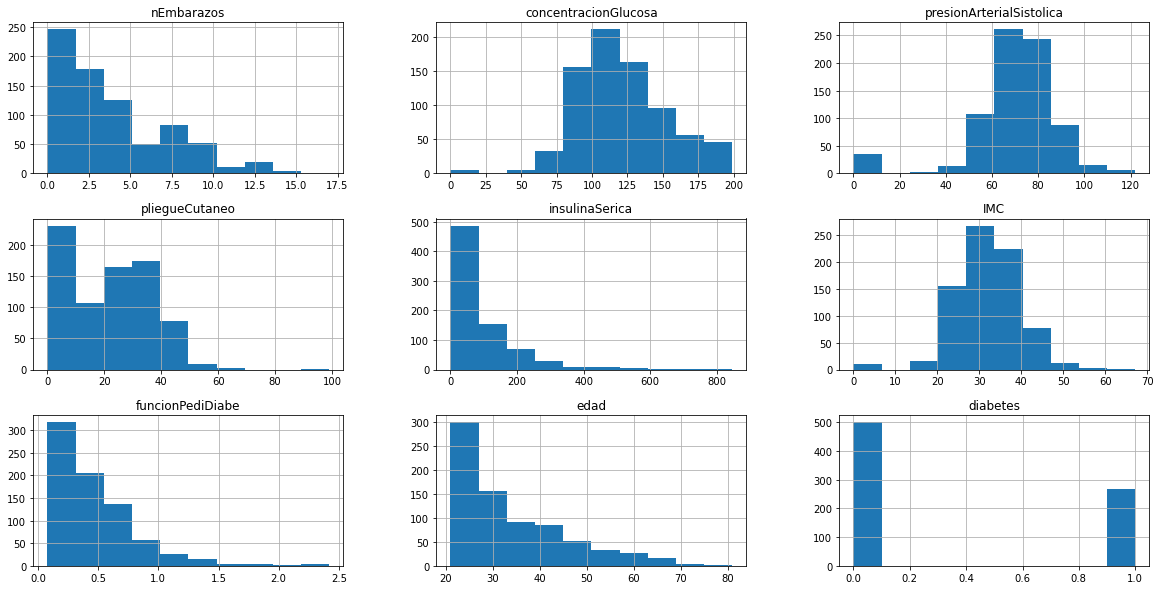

In [6]:
plt.rcParams['figure.figsize'] = [20, 10];
# Dibujar histogramas de todos los atributos
df_base.hist()
plt.show()

In [7]:
df_base.describe()

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_base.head(20)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


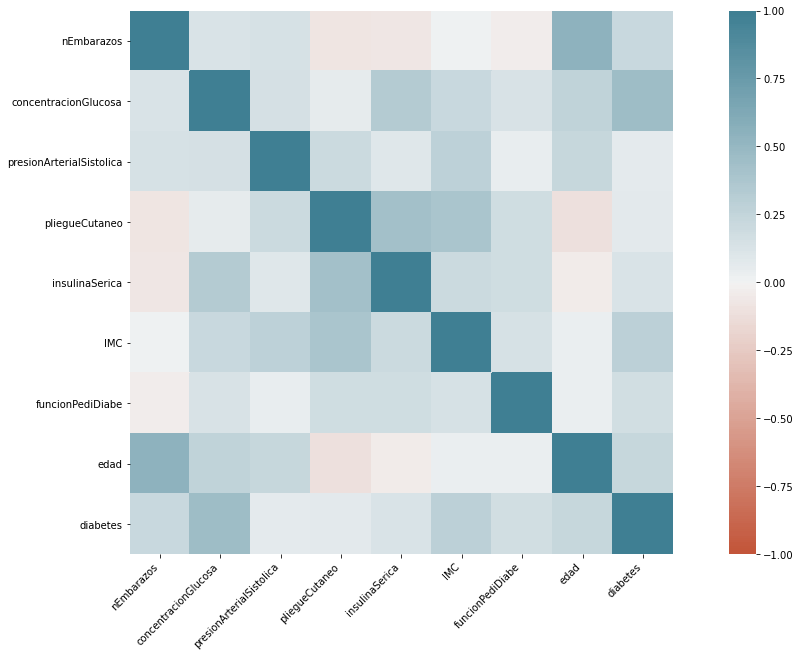

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr= df_base.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 3.- Tratamiento de missing. 

Antes de realizar cualquier evaluación sobre los datos es importante siempre realizar un tratamiento previo con el fin de abordar el problema de los datos faltantes. Se citan algunos ejemplos: 
* Si la cantidad de datos faltantes es muy grande se recomienda borrar estas variables.
* Si existe una cantidad pequeña de filas con datos faltantes en sus variables se puede optar por borrarlas.
* Para variables categóricas se puede agregar un estado adicional que describa este factor.
* Se puede llenar los datos faltantes con la media, mediana o moda de la variable tanto para variables numéricas o categóricas.
* Para variables categóricas, se puede optar por una asignación aleatoria de categorías escogiendo aquellas que se encuentren presentes en esa variable, tratado de buscar que se encuentren uniformemente distribuidas.
* En ocasiones no existen valores faltantes o nulos, existen valores en cero que realmente están reflejando datos faltantes. 


## Se obtiene las columnas que tienen datos faltantes.

In [10]:
col_total_nulos = df_base.isnull().sum()
serie_col_nombres = col_total_nulos[col_total_nulos > 0]
display(serie_col_nombres)

Series([], dtype: int64)

No existen valores faltantes

## Revisar valores en cero

Si observamos el resultado del describe del análisis exploratorio de los datos, podemos ver que hay muchas columnas con valor mínimo en cero. Y no tiene mucho sentido, así que se trata de valores faltantes. Las siguientes columnas no deben tener valor en cero.

* Concentración de Glucosa
* Presión arterial diastólica
* Pliegue cutáneo en triceps
* Insulina sérica
* Indice de Masa Corporal IMC.

Si vemos las 20 primeras filas del análisis exploratorio de los datos, podemos ver ceros en la columna 3, 4 y 5. Contemos ahora los ceros que existen en cada columna del dataset.
### Sumemos los ceros por columna

In [11]:
(df_base==0).sum(axis=0)

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                    500
dtype: int64

Podemos ver que las columnas 2,3 y 6 tienen pocas filas con valores en cero. Pero las columnas 4 y 5 casi la mitad de los datos están en cero. Así que necesitaremos diferentes estrategias para poder llenar los valores faltantes. 

# 4.- Manejo de valores faltantes

En Python, específicamente con Pandas, NumPy y Scikit-Learn, se marcan los valores faltantes como NaN.

In [12]:
# Ejemplo de marcar missing values con nan values.
from numpy import nan
# Reemplazar '0' con valores 'nan'
cols = ['concentracionGlucosa','presionArterialSistolica','pliegueCutaneo','insulinaSerica','IMC'] 
df_base[cols] = df_base[cols].replace({'0':np.nan, 0:np.nan})
# Contar el número de nan por columna
print(df_base.isnull().sum())

nEmbarazos                    0
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64


## Eliminar filas con valores faltantes

La estrategia más sencilla para manejar los datos faltantes es eliminar los registros que contienen un valor perdido.

Podemos hacer esto creando un nuevo Pandas DataFrame con las filas que contienen los valores faltantes

Pandas proporciona la función dropna () que se puede utilizar para eliminar columnas o filas con datos faltantes. Podemos usar dropna () para eliminar todas las filas con datos faltantes, de la siguiente manera:

In [13]:
from numpy import nan
df_base_missing_dropn=df_base.copy()
# Revisar cuántas filas y columnas tiene df_base_missing_dropn
print(df_base_missing_dropn.shape)
# Borrar filas con datos faltantes
df_base_missing_dropn.dropna(inplace=True)
# Ahora cuántas filas hay
df_base_missing_dropn.shape

(768, 9)


(392, 9)

Al ejecutar este ejemplo, podemos ver que el número de filas se ha reducido mucho. De 768 en el conjunto de datos original a 392 con todas las filas que contienen un NaN eliminado.

## Eliminar columnas con un % de valores faltantes
Ahora eliminemos aquellas columnas que tienen un % de nulos mayor a un parámetro definido previamente.

In [16]:
df_base_missing_dropnColumns=df_base.copy()
perc = 25.0 # mayor al 25% de valores faltantes
min_count =  int(((100-perc)/100)*df_base_missing_dropnColumns.shape[0] + 1)
df_base_missing_dropnColumns = df_base_missing_dropnColumns.dropna( axis=1, 
                    thresh=min_count)

In [17]:
df_base_missing_dropnColumns.shape

(768, 7)

In [21]:
df_base_missing_dropnColumns.head(20)
#Se elimina Insulina y pliegue

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.000000,33.600000,0.627,50,1
1,1,85.0,66.000000,26.600000,0.351,31,0
2,8,183.0,64.000000,23.300000,0.672,32,1
3,1,89.0,66.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,25.600000,0.201,30,0
6,3,78.0,50.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,35.300000,0.134,29,0
8,2,197.0,70.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,32.457464,0.232,54,1


## Reemplazar valores faltantes con la media

In [22]:
df_base_missing_mean=df_base.copy()
df_base_missing_mean=df_base_missing_mean.fillna(df_base_missing_mean.mean())
display('Verificación de datos faltantes : {0}'.format(df_base_missing_mean.isnull().sum().max()))

'Verificación de datos faltantes : 0'

In [23]:
df_base_missing_mean.head(20)
#df_base_missing_mean.head(20)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


## Reemplazar valores faltantes con la moda

In [24]:
df_base_missing_mode=df_base.copy()
df_base_missing_mode.head(20)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_base_missing_mode)
df_base_missing_mode = imputer.transform(df_base_missing_mode)
#Pasar el numpy array a dataframe.
df_base_missing_mode=pd.DataFrame(df_base_missing_mode)
#df_base_missing_mode=df_base_missing_mode.fillna(df_base_missing_mode.mode(), inplace=True)
display('Verificación de datos faltantes : {0}'.format(df_base_missing_mode.isnull().sum().max()))

'Verificación de datos faltantes : 0'

In [58]:
df_base_missing_mode.head(20)

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5.0,116.0,74.0,32.0,105.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,70.0,32.0,105.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,32.0,105.0,32.0,0.232,54.0,1.0


## Reemplazar valores faltantes con una función de interpolación, usando método lineal

In [25]:
df_base_missing_interpo=df_base.copy()
display('Verificación de datos faltantes : {0}'.format(df_base_missing_interpo.isnull().sum().max()))

df_base_missing_interpo=df_base_missing_interpo.interpolate(method ='linear', limit_direction ='forward')
display('Verificación de datos faltantes : {0}'.format(df_base_missing_interpo.isnull().sum().max()))

'Verificación de datos faltantes : 374'

'Verificación de datos faltantes : 3'

Observamos que no se pueden reemplazar todos los valores faltantes

In [26]:
df_base_missing_interpo

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,26.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,146.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,27.0,112.0,30.1,0.349,47,1


In [27]:
df_base_missing_interpo.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
df_base_missing_interpo.shape

(765, 9)

In [28]:
df_base_missing_interpo.head(20)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
3,1,89.0,66.0,23.0,94.00,28.10,0.167,21,0
4,0,137.0,40.0,35.0,168.00,43.10,2.288,33,1
5,5,116.0,74.0,33.5,128.00,25.60,0.201,30,0
6,3,78.0,50.0,32.0,88.00,31.00,0.248,26,1
7,10,115.0,60.0,38.5,315.50,35.30,0.134,29,0
8,2,197.0,70.0,45.0,543.00,30.50,0.158,53,1
9,8,125.0,96.0,40.6,603.60,34.05,0.232,54,1
10,4,110.0,92.0,36.2,664.20,37.60,0.191,30,0
11,10,168.0,74.0,31.8,724.80,38.00,0.537,34,1
12,10,139.0,80.0,27.4,785.40,27.10,1.441,57,0


# 5.- Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos.
* Se utiliza la función de correlación de las variables, en donde un mejor modelo debe considerar aquellas variables más correladas con la variable a estimar y aquellas variables más decorrelladas entre sí. Aclarar que esto dependerá del método de aprendizaje que utilicemos.

In [29]:
display(df_base.corr())

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
nEmbarazos,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
concentracionGlucosa,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
presionArterialSistolica,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
pliegueCutaneo,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
insulinaSerica,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
IMC,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
funcionPediDiabe,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
edad,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
diabetes,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


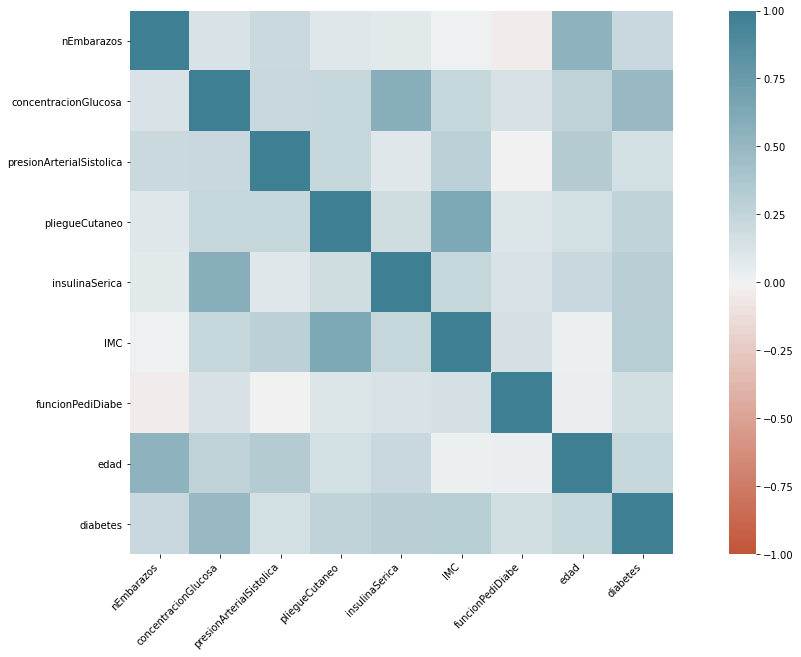

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr= df_base.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 6.- Aplicar Árboles de decisión y Random Forest con el dataframe a los que se eliminó todas las filas con valores faltantes

### Determinar el conjunto de modelización y el de validación
* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [33]:
X = df_base_missing_dropn.drop(columns = ['diabetes']).copy()
y = df_base_missing_dropn['diabetes']

# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)


## 6.1. Pasos para aplicar árboles 

In [35]:
clas_arboles = DecisionTreeClassifier(max_depth=15,
            max_features='auto',  min_samples_leaf=1,
            random_state=semilla_aleatoria, splitter='best')
clas_arboles.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=1234)

### Predicción del modelo.

In [36]:
predEY_clas_arb=clas_arboles.predict(test_x)

### Métricas.

In [37]:
predEY_clas_arb=clas_arboles.predict(test_x)

In [38]:
display(confusion_matrix(test_y,predEY_clas_arb))
clas_report=classification_report(test_y,predEY_clas_arb)
print(clas_report)

array([[42, 13],
       [11, 13]], dtype=int64)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        55
           1       0.50      0.54      0.52        24

    accuracy                           0.70        79
   macro avg       0.65      0.65      0.65        79
weighted avg       0.70      0.70      0.70        79



### Validación cruzada accuracy score con mínimo 5 folds.

In [39]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=semilla_aleatoria)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

array([0.73015873, 0.6984127 , 0.6984127 , 0.69354839, 0.67741935])

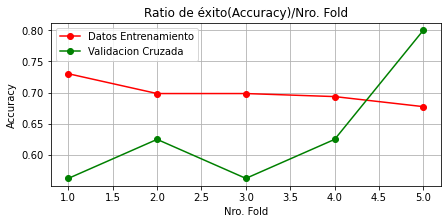

In [285]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 6.2. Pasos método Clasificación Random Forest
### Parametrización del algoritmo de clasificación.

In [40]:
clas_rndforest = RandomForestClassifier(n_estimators=100,n_jobs=2, random_state=semilla_aleatoria)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [41]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

### Métricas.

In [42]:
display(confusion_matrix(test_y,predEY_clas_rnd))
class_report=classification_report(test_y,predEY_clas_rnd)
print(class_report)

array([[47,  8],
       [10, 14]], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.64      0.58      0.61        24

    accuracy                           0.77        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.77      0.77      0.77        79



array([0.79365079, 0.79365079, 0.77777778, 0.75806452, 0.77419355])

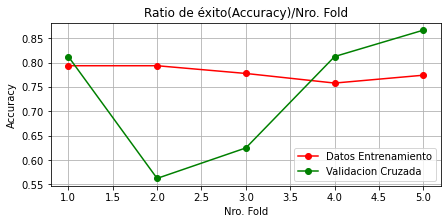

In [43]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

# 7.- Aplicar Árboles de decisión y Random Forest con el dataframe a los que se eliminó columnas con un % de valores faltantes

### Determinar el conjunto de modelización y el de validación
* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [44]:
X = df_base_missing_dropnColumns.drop(columns = ['diabetes']).copy()
y = df_base_missing_dropnColumns['diabetes']

# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)


## 7.1. Pasos para aplicar árboles 

In [45]:
clas_arboles = DecisionTreeClassifier(max_depth=15,
            max_features='auto',  min_samples_leaf=1,
            random_state=semilla_aleatoria, splitter='best')
clas_arboles.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=1234)

### Predicción del modelo.

In [46]:
predEY_clas_arb=clas_arboles.predict(test_x)

### Métricas.

In [47]:
display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

array([[75, 24],
       [23, 32]], dtype=int64)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        99
           1       0.57      0.58      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



### Validación cruzada accuracy score con mínimo 5 folds.

array([0.71544715, 0.66666667, 0.6504065 , 0.57723577, 0.68852459])

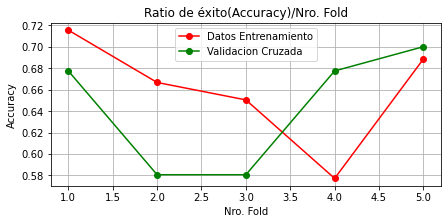

In [48]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 7.2. Pasos método Clasificación Random Forest
### Parametrización del algoritmo de clasificación.

In [49]:
clas_rndforest = RandomForestClassifier(n_estimators=100,n_jobs=2, random_state=semilla_aleatoria)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [50]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

### Métricas.

In [51]:
display(confusion_matrix(test_y,predEY_clas_rnd))
class_report=classification_report(test_y,predEY_clas_rnd)
print(class_report)

array([[86, 13],
       [30, 25]], dtype=int64)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        99
           1       0.66      0.45      0.54        55

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.67       154
weighted avg       0.71      0.72      0.71       154



array([0.82926829, 0.7398374 , 0.79674797, 0.72357724, 0.80327869])

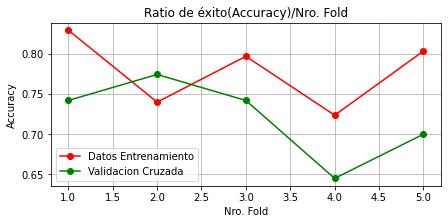

In [52]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

# 8.- Aplicar Árboles de decisión y Random Forest con el dataframe a los que se les imputa valores con la media

### Determinar el conjunto de modelización y el de validación
* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [53]:
X = df_base_missing_mean.drop(columns = ['diabetes']).copy()
y = df_base_missing_mean['diabetes']

# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)

## 8.1. Pasos para aplicar árboles

In [54]:
clas_arboles = DecisionTreeClassifier(max_depth=15,
            max_features='auto',  min_samples_leaf=1,
            random_state=semilla_aleatoria, splitter='best')
clas_arboles.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=1234)

### Predicción del modelo.

In [55]:
predEY_clas_arb=clas_arboles.predict(test_x)

### Métricas.

In [56]:
display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

array([[72, 27],
       [17, 38]], dtype=int64)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        99
           1       0.58      0.69      0.63        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



### Validación cruzada accuracy score con mínimo 5 folds.

array([0.74796748, 0.7398374 , 0.67479675, 0.6504065 , 0.72131148])

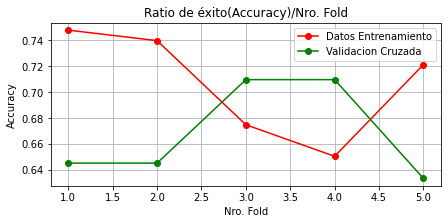

In [57]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 8.2. Pasos método Clasificación Random Forest
### Parametrización del algoritmo de clasificación.

In [58]:
clas_rndforest = RandomForestClassifier(n_estimators=100,n_jobs=2, random_state=semilla_aleatoria)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [59]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

### Métricas.

In [60]:
display(confusion_matrix(test_y,predEY_clas_rnd))
class_report=classification_report(test_y,predEY_clas_rnd)
print(class_report)

array([[86, 13],
       [27, 28]], dtype=int64)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        99
           1       0.68      0.51      0.58        55

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



array([0.82113821, 0.76422764, 0.7398374 , 0.73170732, 0.79508197])

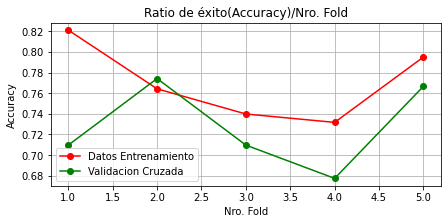

In [61]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 9. Aplicar Árboles de decisión y Random Forest con el dataframe a los que se les imputa valores con una función de interpolación
### Determinar el conjunto de modelización y el de validación
* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [62]:
X = df_base_missing_interpo.drop(columns = ['diabetes']).copy()
y = df_base_missing_interpo['diabetes']

In [63]:
# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)

## 9.1. Pasos para aplicar árboles 

In [64]:
clas_arboles = DecisionTreeClassifier(max_depth=15,
            max_features='auto',  min_samples_leaf=1,
            random_state=semilla_aleatoria, splitter='best')
clas_arboles.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=1234)

### Predicción del modelo.

In [65]:
predEY_clas_arb=clas_arboles.predict(test_x)

### Métricas.

In [66]:
display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

array([[82, 20],
       [15, 36]], dtype=int64)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       102
           1       0.64      0.71      0.67        51

    accuracy                           0.77       153
   macro avg       0.74      0.75      0.75       153
weighted avg       0.78      0.77      0.77       153



### Validación cruzada accuracy score con mínimo 5 folds.

array([0.68292683, 0.59349593, 0.64754098, 0.68852459, 0.69672131])

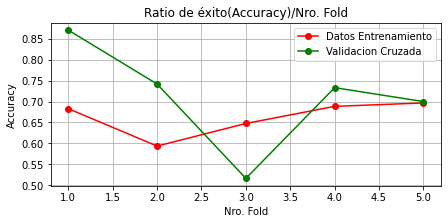

In [67]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 9.2. Pasos método Clasificación Random Forest
### Parametrización del algoritmo de clasificación.

In [68]:
clas_rndforest = RandomForestClassifier(n_estimators=100,n_jobs=2, random_state=semilla_aleatoria)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [69]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

### Métricas.

In [70]:
display(confusion_matrix(test_y,predEY_clas_rnd))
class_report=classification_report(test_y,predEY_clas_rnd)
print(class_report)

array([[93,  9],
       [20, 31]], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       102
           1       0.78      0.61      0.68        51

    accuracy                           0.81       153
   macro avg       0.80      0.76      0.77       153
weighted avg       0.81      0.81      0.80       153



array([0.71544715, 0.72357724, 0.73770492, 0.69672131, 0.68852459])

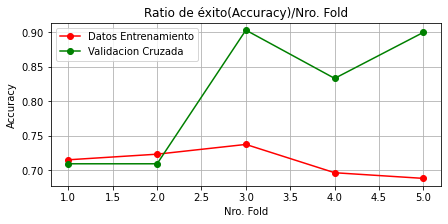

In [71]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)